In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nltk

In [ ]:
#loading the imdb reviews dataset
imdb_data , metadata = tfds.load("imdb_reviews",  with_info=True , as_supervised=True)
print(metadata)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete9EZ5DP/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete9EZ5DP/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete9EZ5DP/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew

In [ ]:
#generating the reviews & labels for train & test set
train_data , test_data = imdb_data['train'] , imdb_data['test']
train_reviews = []
train_labels = []

test_reviews = []
test_labels = []

for i,j in train_data:
  train_reviews.append(str(i.numpy()))
  train_labels.append(j.numpy())

print(train_reviews[0],train_labels[0],len(train_reviews[0]))

for i,j in test_data:
  test_reviews.append(str(i.numpy()))
  test_labels.append(j.numpy())

print(test_reviews[0],test_labels[0],len(test_reviews[0]))

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it." 0 712
b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any o

In [ ]:
print(test_reviews[11000])

b'During my teens or should I say prime time I was "eating up" all kinds of SF novels every day of the week. It was in the Sixties and Seventies when TV was not such a important leisure time killer like today, one night in the mid seventies I watched the movie on TV I think it was ARD and I was stunned. I was impressed in a way that I can almost remember each scene even today.<br /><br />Nowadays I observe my kids playing the SIMS or something like that and I think we are close to what that Fassbender Movie expressed. I also would highly appreciate if I could buy this movie on a DVD. But in vain I tried almost everything to get a hint where. The movie MATRIX cannot touch by far the quality and the state of art of this movie. And by the way by now we do not have a glue if we were a superior reality or just one of a couple simulation models. Probably after our death we definitely will know...'


In [ ]:
import string,re
def pre_process(i):
    #removing tags
    i = re.compile(r'<[^>]+>').sub('',i)
    #remove any single chars
    i = re.sub(r"\s+[a-zA-Z]\s+", ' ', i)
    #remove numbers
    i = re.sub(r"([0-9]+)", ' ', i)
    #remove punctuations
    table = str.maketrans(dict.fromkeys(string.punctuation))
    i = i.translate(table)
    # remove double spaces
    i = re.sub(r'\s+', ' ', i)
    return i


for i in range(len(train_reviews)):
  train_reviews[i] =  pre_process(train_reviews[i])

for j in range(len(test_reviews)):
  test_reviews[j] = pre_process(test_reviews[j])

print(train_reviews[0])
print(test_reviews[0])

bThis was an absolutely terrible movie Dont be lured in by Christopher Walken or Michael Ironside Both are great actors but this must simply be their worst role in history Even their great acting could not redeem this movies ridiculous storyline This movie is an early nineties US propaganda piece The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions Maria Conchita Alonso appeared phony and her pseudolove affair with Walken was nothing but pathetic emotional plug in movie that was devoid of any real meaning am disappointed that there are movies like this ruining actors like Christopher Walkens good name could barely sit through it
bThere are films that make careers For George Romero it was NIGHT OF THE LIVING DEAD for Kevin Smith CLERKS for Robert Rodriguez EL MARIACHI Add to that list Onur Tukels absolutely amazing DINGALINGLESS Flawless filmmaking and as assured and as professional as any of the aforementioned movies havent laughed this 

In [ ]:
# removing stop words from training sentences

'''Earlier I used this, however after training I realised my model was overfitting.
 Thus I stopped running this to add more noise to the training data'''
 
def filter_sent(sentences,stop_words):
  temp_sentences = []
  s = ' '
  for i in sentences:
    temp = [ word for word in i.split() if word not in stop_words]
    temp_sentences.append(s.join(temp))
  return temp_sentences

nltk.download('stopwords')
from nltk.corpus import stopwords
print(train_reviews[0])
stop_words = set(stopwords.words("english"))
train_reviews = filter_sent(train_reviews,stop_words)

print(train_reviews[0])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
b"This absolutely terrible movie. Don't lured Christopher Walken Michael Ironside. Both great actors, must simply worst role history. Even great acting could redeem mov

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pickle 
# Tokenizing training & testing sentences
reviews = train_reviews + test_reviews 

tokenizer = Tokenizer(num_words = 5000, oov_token='<N>')
tokenizer.fit_on_texts(reviews)

with open('tokenizer.pickle','wb') as handle:
  pickle.dump(tokenizer , handle , protocol=pickle.HIGHEST_PROTOCOL)

word_index = tokenizer.word_index

vocab_size = len(word_index) + 1

training_sequences = tokenizer.texts_to_sequences(train_reviews)
training_padded = pad_sequences(training_sequences,maxlen=500)

testing_sequences = tokenizer.texts_to_sequences(test_reviews)
testing_padded = pad_sequences(testing_sequences,maxlen=500)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

print(training_padded[1],train_reviews[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
# creating a basic sequential model
model_one = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 100, input_length=500),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_one.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 100)          21992100  
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               234496    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 22,226,853
Trainable params: 22,226,853
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#training
N = 5
model_one.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_one = model_one.fit(training_padded, train_labels, epochs=N, validation_data=(testing_padded, test_labels))

Epoch 1/5
782/782 [==============================] - 332s 424ms/step - loss: 0.4350 - accuracy: 0.8045 - val_loss: 0.3550 - val_accuracy: 0.8510
Epoch 2/5
782/782 [==============================] - 329s 421ms/step - loss: 0.3496 - accuracy: 0.8541 - val_loss: 0.4265 - val_accuracy: 0.8143
Epoch 3/5
782/782 [==============================] - 332s 424ms/step - loss: 0.4472 - accuracy: 0.7882 - val_loss: 0.3855 - val_accuracy: 0.8332
Epoch 4/5
782/782 [==============================] - 332s 425ms/step - loss: 0.2888 - accuracy: 0.8807 - val_loss: 0.3345 - val_accuracy: 0.8554
Epoch 5/5
782/782 [==============================] - 332s 425ms/step - loss: 0.2264 - accuracy: 0.9122 - val_loss: 0.3405 - val_accuracy: 0.8599


In [ ]:
# plotting metrics using matplot lib
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
def getGraph(history,title,N):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
  plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy"+ title)
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend(loc="lower left")


782/782 [==============================] - 58s 74ms/step - loss: 0.3405 - accuracy: 0.8599
[0.34048449993133545, 0.8599200248718262]


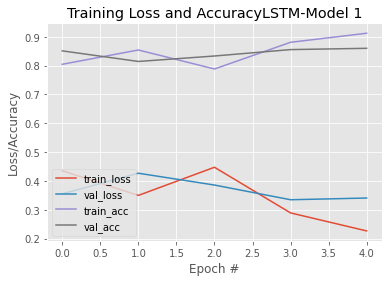

In [ ]:
getGraph(history_one, 'LSTM-Model 1',5)
print(model_one.evaluate(testing_padded,test_labels,verbose=1))


In [ ]:
model_two = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 100, input_length=500),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_two.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 100)          21992100  
_________________________________________________________________
flatten_1 (Flatten)          (None, 50000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 50001     
Total params: 22,042,101
Trainable params: 22,042,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#training
N = 3
model_two.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_two = model_two.fit(training_padded, train_labels, epochs=N, validation_data=(testing_padded, test_labels))

Epoch 1/3
782/782 [==============================] - 182s 233ms/step - loss: 0.4160 - accuracy: 0.8007 - val_loss: 0.3121 - val_accuracy: 0.8642
Epoch 2/3
782/782 [==============================] - 182s 233ms/step - loss: 0.1851 - accuracy: 0.9322 - val_loss: 0.3041 - val_accuracy: 0.8704
Epoch 3/3
782/782 [==============================] - 182s 233ms/step - loss: 0.0707 - accuracy: 0.9850 - val_loss: 0.3351 - val_accuracy: 0.8668


782/782 [==============================] - 3s 4ms/step - loss: 0.3351 - accuracy: 0.8668
[0.3350616693496704, 0.8668400049209595]


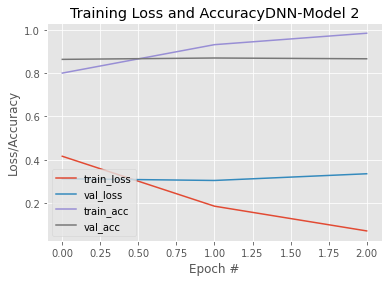

In [ ]:
getGraph(history_two, 'DNN-Model 2',3)
print(model_two.evaluate(testing_padded,test_labels,verbose=1))

In [ ]:
model_three = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 100, input_length=500),
    tf.keras.layers.Conv1D(128,5,activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_three.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 100)          21992100  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 128)          64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 22,056,357
Trainable params: 22,056,357
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#training
N = 5
model_three.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_three = model_three.fit(training_padded, train_labels, epochs=N, validation_data=(testing_padded, test_labels))

Epoch 1/5
782/782 [==============================] - 189s 241ms/step - loss: 0.4149 - accuracy: 0.8040 - val_loss: 0.3034 - val_accuracy: 0.8699
Epoch 2/5
782/782 [==============================] - 188s 241ms/step - loss: 0.2292 - accuracy: 0.9082 - val_loss: 0.2918 - val_accuracy: 0.8797
Epoch 3/5
782/782 [==============================] - 188s 240ms/step - loss: 0.1338 - accuracy: 0.9556 - val_loss: 0.3077 - val_accuracy: 0.8808
Epoch 4/5
782/782 [==============================] - 187s 239ms/step - loss: 0.0622 - accuracy: 0.9846 - val_loss: 0.3451 - val_accuracy: 0.8791
Epoch 5/5
782/782 [==============================] - 186s 238ms/step - loss: 0.0219 - accuracy: 0.9974 - val_loss: 0.3964 - val_accuracy: 0.8760


782/782 [==============================] - 5s 7ms/step - loss: 0.3964 - accuracy: 0.8760
[0.3963869512081146, 0.8759599924087524]


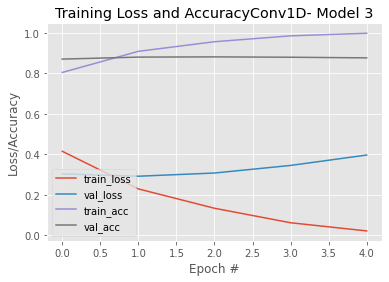

In [ ]:
getGraph(history_three, 'Conv1D- Model 3',5)
print(model_three.evaluate(testing_padded,test_labels,verbose=1))

In [ ]:
model_one.save('movie_one.h5')
model_two.save('movie_two.h5')
model_three.save('movie_three.h5')

In [ ]:
print(test_labels[101:104])
print(test_reviews[101:104])

[0 1 1]
['bTwo years after leaving the small town of Grovers Bend due to encountering the Krites Brad Brown returns to spend time with his grandmother in time for Easter Meanwhile the Krite eggs begin to hatch As they cause trouble in the town Brown the townsfolk as well as the alien bounty hunters who have returned to finish the creatures must fight the bloodthirsty furballs before they wipe out the townThe original Critters was minor attempt to ripoff the familyhorror flick Gremlins It became cult favourite on the video shelves was successful enough to warrant sequel This sequel plays down the horror makes its entire focus comedy instead Unfortunately the comedy part is extremely clumsy as well as childish The acting is on par with the rest of the film It is just that the film suffers from weak script The visual effects are fairly well doneGrade D Review by M K Geist', 'bThis type of show is not supposed to happen on television This is the type of edginess usually reserved for indepe

Since output function is sigmoid, 0.6 & above positive. and 0.4 & below negative

In [ ]:
model_one.predict(testing_padded[101:104])

array([[0.00996748],
       [0.8159473 ],
       [0.9735474 ]], dtype=float32)

In [ ]:
model_two.predict(testing_padded[101:104])

array([[0.00169116],
       [0.8566813 ],
       [0.9925175 ]], dtype=float32)

In [ ]:
model_three.predict(testing_padded[101:104])

array([[0.00174658],
       [0.99994695],
       [0.9990446 ]], dtype=float32)

Model 3 shows best validation accuracy. But 1 seems to have the best learning graph.

All these models can be improved by adding more layers , and a few dropout layers as well (overfitting in case of Model 2 & 3)